# Representación gráfica de la solución

## 1. ¿Cómo se mueve un péndulo? 


> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

**Referencias**: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html
   
**En realidad esto es el estudio de oscilaciones.**
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg/712px-Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg" width="400px" height="100px" />
 </div>

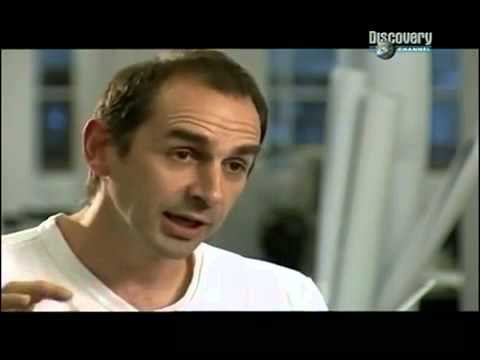

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema masa-resorte y el péndulo simple.

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="210px" height="70px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="260px" height="120px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

## Solución en el tiempo
El modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
v(t) = \frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

**¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def x(t,w0):
    A = 1
    B = 1
    return (A*np.cos(w0*t)) + (B*np.sin(w0*t))

In [9]:
def v(t,w0):
    A = 1
    B = 1
    return w0 * ((-A*np.sin(w0*t)) + (B*np.cos(w0*t)))

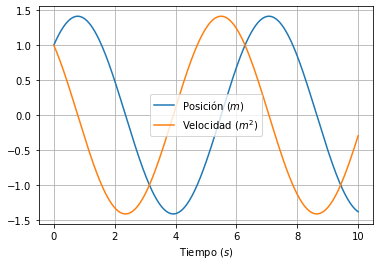

In [11]:
t = np.linspace(0,10,500)
w0  = 1
plt.plot(t,x(t,w0), label = 'Posición ($m$)')
plt.plot(t,v(t,w0), label = 'Velocidad ($m^2$)')
plt.xlabel('Tiempo ($s$)')
plt.legend()
plt.grid()

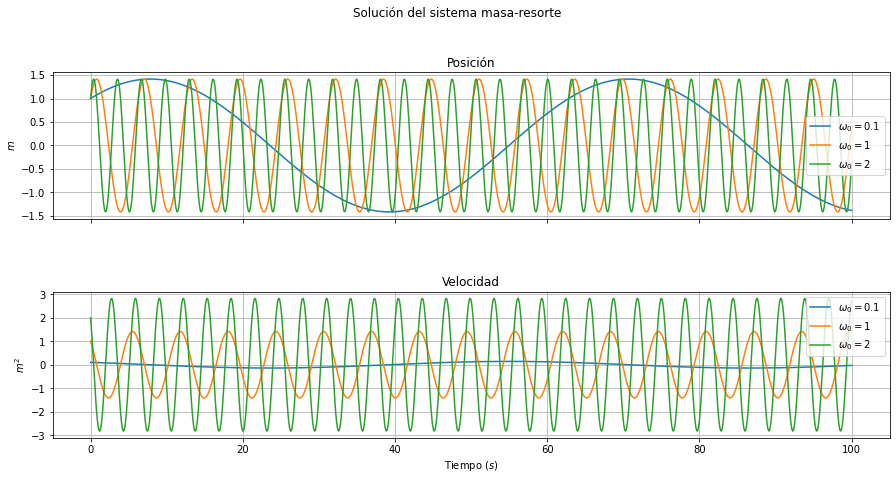

In [53]:
# Para gtráficar múltiples frecuencias
W = [0.1,1,2]
#fig,ax = plt.subplots(2,1)
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(2,1, hspace = 0.5, top = 0.85)
ax = gs.subplots()
fig.suptitle('Solución del sistema masa-resorte')
for w0 in W:
    ax[0].plot(t,x(t,w0), label = '$\omega_0 = {}$'.format(w0))
    ax[1].plot(t,v(t,w0), label = '$\omega_0 = {}$'.format(w0))
#ax[0].set_title('Posición')
#ax[1].set_title('Velocidad')
ax[0].set(title = 'Posición', ylabel = '$m$')
ax[1].set(title = 'Velocidad', ylabel = '$m^2$', xlabel = 'Tiempo ($s$)')
for axes in ax:
    axes.label_outer() # Para que únicamente se muestren las etiquetas externas
    axes.legend()
    axes.grid()

In [37]:
import  matplotlib as mpl

In [39]:
# mpl.defaultParams[] #Mucho Cuidado aquí

**Plano de fase**

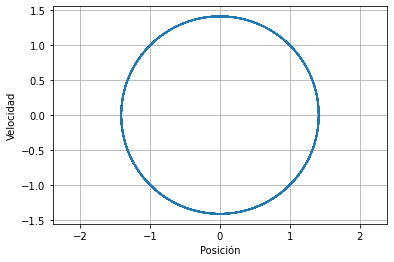

In [54]:
plt.plot(x(t,1),v(t,1))
plt.axis('equal')
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.grid()

Y si consideramos un conjunto de frecuencias de oscilación, entonces

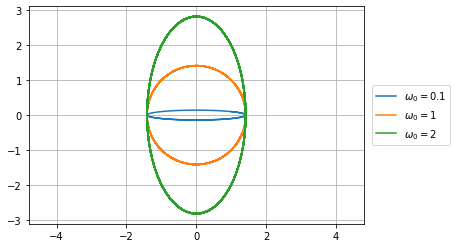

In [57]:
W = [0.1,1,2]
t = np.linspace(0,100,1000)
for w0 in W:
    plt.plot(x(t,w0), v(t,w0), label = '$\omega_0 = {}$'.format(w0))
'''
best
upper right
upper left
lower right
lower left
center right
center left
lower center
upper center
center
right
left
'''
plt.legend(loc = 'center left', bbox_to_anchor = (1.01,0.5))
plt.axis('equal')
plt.grid()

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x})$.

## Gráfico interactivo
La posición y velocidad para el sistema `masa-resorte` se escriben como: 
\begin{align}
x(t) &= x(0) \cos(\omega_{0} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)
\end{align}

Importemos la clase `interact` e `interact_manual`

**Actividad:** Crear un gráfico interactivo para variar la posición inicial $\dot x_0$ y la frecuencia fundamental $\omega_0$, para la velocidad del sistema `masa-resorte`.

## Animación
importemos ahora la función `FuncAnimation` del paquete `matplotlib.animation`

**Animación del péndulo.**

La solución para el sistema reducido del `péndulo` es

\begin{align}
\theta(t) &= \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{\theta}(t) &= -\omega_{0}\theta(0) \sin(\omega_{0} t) + \dot{\theta}(0)\cos(\omega_{0}t).
\end{align}

Las posiciones $x$ y $y$ se obtienen de la descomposición entre la longitud y el ángulo:

\begin{align}
x &= l \sin(\theta), \quad
y = -l \cos(\theta) .
\end{align}

Animación del sitema masa-resorte